In [1]:
import os    
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

In [2]:
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)


In [3]:
train_data[2]
train_labels[0]

1

In [4]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join(
    [reverse_word_index.get(i-3,'?') for i in train_data[2]])

In [5]:
decoded_review

"? this has to be one of the worst films of the 1990s when my friends i were watching this film being the target audience it was aimed at we just sat watched the first half an hour with our jaws touching the floor at how bad it really was the rest of the time everyone else in the theatre just started talking to each other leaving or generally crying into their popcorn that they actually paid money they had ? working to watch this feeble excuse for a film it must have looked like a great idea on paper but on film it looks like no one in the film has a clue what is going on crap acting crap costumes i can't get across how ? this is to watch save yourself an hour a bit of your life"

In [6]:
import numpy as np

In [7]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i,sequence]=1.
    return results
x_train=vectorize_sequences(train_data)
x_test=vectorize_sequences(test_data)
    

In [8]:
x_train[1]

array([0., 1., 1., ..., 0., 0., 0.])

In [9]:
y_train=np.asarray(train_labels).astype('float32')
y_test=np.asarray(test_labels).astype('float32')

In [10]:
y_train[1]

0.0

In [11]:
train_labels[1]

0

In [12]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [32]:
x_val=x_train[:10000]
partial_x_train=x_train[10000:]
y_val=y_train[:10000]
partial_y_train=y_train[10000:]


In [33]:
history=model.fit(partial_x_train,
                  partial_y_train,
                  epochs=20,
                  batch_size=512,
                  validation_data=(x_val,y_val))

Epoch 1/20
30/30 [==============================] - 5s 155ms/step - loss: 0.0030 - accuracy: 0.9999 - val_loss: 0.7240 - val_accuracy: 0.8655
Epoch 2/20
30/30 [==============================] - 2s 53ms/step - loss: 0.0065 - accuracy: 0.9980 - val_loss: 0.7377 - val_accuracy: 0.8659
Epoch 3/20
30/30 [==============================] - 1s 38ms/step - loss: 0.0017 - accuracy: 0.9999 - val_loss: 0.7605 - val_accuracy: 0.8659
Epoch 4/20
30/30 [==============================] - 1s 26ms/step - loss: 0.0038 - accuracy: 0.9989 - val_loss: 0.8042 - val_accuracy: 0.8641
Epoch 5/20
30/30 [==============================] - 1s 19ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.8181 - val_accuracy: 0.8632
Epoch 6/20
30/30 [==============================] - 1s 19ms/step - loss: 9.2952e-04 - accuracy: 1.0000 - val_loss: 0.9408 - val_accuracy: 0.8570
Epoch 7/20
30/30 [==============================] - 1s 19ms/step - loss: 0.0015 - accuracy: 0.9997 - val_loss: 0.8795 - val_accuracy: 0.8640
Epoch 8/

In [15]:
history_dict=history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


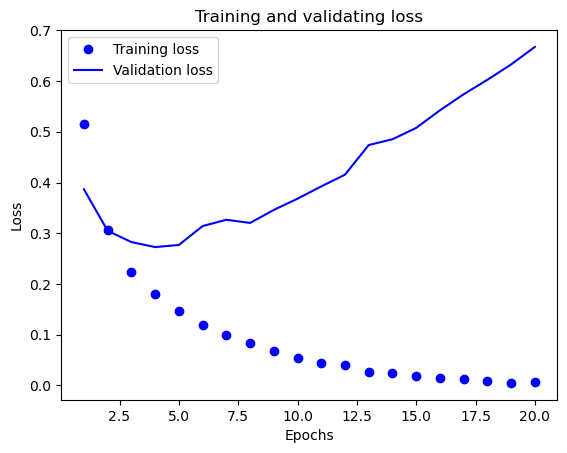

In [17]:

import matplotlib.pyplot as plt

loss_values=history_dict['loss']
val_loss_values=history_dict['val_loss']
accuracy_values=history_dict['accuracy']
val_accuracy_values=history_dict['val_accuracy']

epochs =range(1, len(history_dict['accuracy']) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validating loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

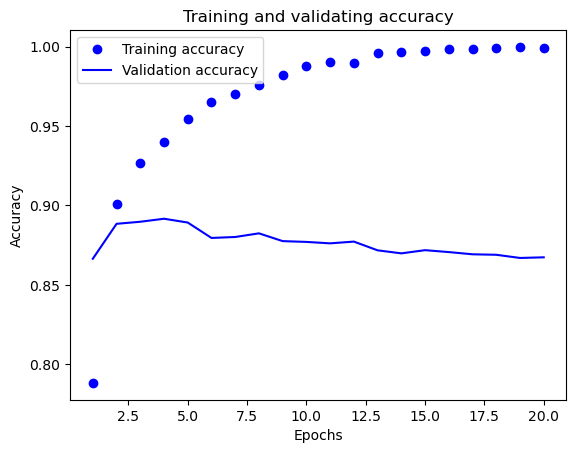

In [18]:
plt.clf()
acc_values=history_dict['accuracy']
plt.plot(epochs, accuracy_values, 'bo',label='Training accuracy')
plt.plot(epochs, val_accuracy_values, 'b', label='Validation accuracy')
plt.title('Training and validating accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [19]:


model2 = models.Sequential()
model2.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model2.add(layers.Dense(16, activation='relu'))
model2.add(layers.Dense(1,activation='sigmoid'))
model2.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [20]:
history2=model2.fit(partial_x_train,
                  partial_y_train,
                  epochs=4,
                  batch_size=512,
                  validation_data=(x_val,y_val))

Epoch 1/4
30/30 [==============================] - 2s 46ms/step - loss: 0.5212 - accuracy: 0.7733 - val_loss: 0.3965 - val_accuracy: 0.8702
Epoch 2/4
30/30 [==============================] - 0s 12ms/step - loss: 0.3171 - accuracy: 0.9020 - val_loss: 0.3487 - val_accuracy: 0.8626
Epoch 3/4
30/30 [==============================] - 0s 13ms/step - loss: 0.2354 - accuracy: 0.9262 - val_loss: 0.2834 - val_accuracy: 0.8900
Epoch 4/4
30/30 [==============================] - 0s 11ms/step - loss: 0.1850 - accuracy: 0.9412 - val_loss: 0.2763 - val_accuracy: 0.8902


In [21]:
model2.predict(x_test)

782/782 [==============================] - 25s 32ms/step


array([[0.22952648],
       [0.9932783 ],
       [0.9002157 ],
       ...,
       [0.07270344],
       [0.1496714 ],
       [0.4247322 ]], dtype=float32)

In [22]:
import numpy as np
from sklearn.metrics import confusion_matrix

predictions = model2.predict(x_test)

binary_predictions = (predictions > 0.5).astype('int')

conf_matrix = confusion_matrix(y_test, binary_predictions)

print("Confusion Matrix:")
print(conf_matrix)


782/782 [==============================] - 23s 29ms/step
Confusion Matrix:
[[11194  1306]
 [ 1653 10847]]


In [ ]:




import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

predictions = model2.predict(x_test)
binary_predictions = (predictions > 0.5).astype('int')
conf_matrix = confusion_matrix(y_test, binary_predictions)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=True, square=True)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.xticks([0.5, 1.5], ['Negative', 'Positive'])
plt.yticks([0.5, 1.5], ['Negative', 'Positive'], rotation=0)
plt.show()


550/782 [====================>.........] - ETA: 8s